# Capstone Project showing Data cleaning , Data exploration

In [1]:
# importing required libraries
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

In [2]:
# reading csv into raw dataframe
df = pd.read_csv("/Users/dallingleed/Downloads/Capstone Project/autos.csv",encoding="latin-1")

df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
# Check Unique vehicleType
df["vehicleType"].unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

In [5]:
# changing the vehicleType from NaN to Others
df["vehicleType"].fillna("Other", inplace=True)

In [6]:
# checking the different types of values in the column offerType
df["offerType"].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [7]:
# changing values of offerType Gesuch to Request and Angebot to Offer
df["offerType"] = df["offerType"].map({'Gesuch':"Request",'Angebot':'Offer'})

In [8]:
# changing values of gearbox 
df["gearbox"] = df["gearbox"].map({'manuell':'Manual','automatik':'Automatic'})

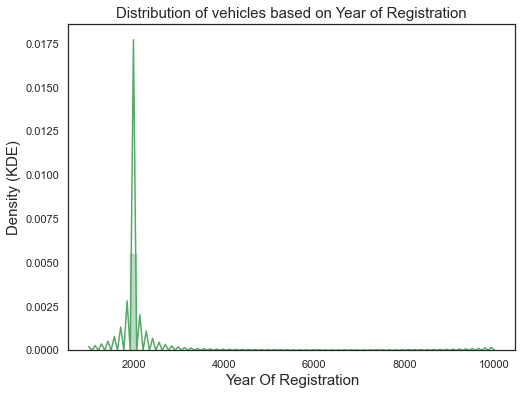

In [9]:
# Distribution of vehicles based on year of registration
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df["yearOfRegistration"], color="g", ax=ax)
ax.set_title('Distribution of vehicles based on Year of Registration', fontsize= 15)
plt.ylabel("Density (KDE)", fontsize= 15)
plt.xlabel("Year Of Registration", fontsize= 15)
plt.show()

In [10]:
#saving thee graphs to the folder

fig.savefig("/Users/dallingleed/Downloads/Capstone Project/vehicle-distribution.png")

In [11]:
# dropping rows that are inconsistent with the dataset based on year of registration
df = df[(df["yearOfRegistration"] >= 1890) & (df["yearOfRegistration"] <= 2016)]

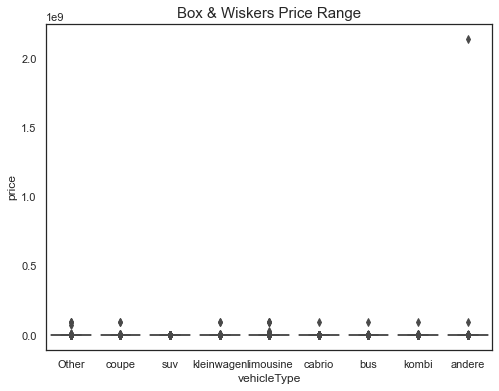

In [12]:
# Boxplot to see the distribution after outliers has been removed
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.set_title('Box & Wiskers Price Range', fontsize= 15)
plt.show()

In [13]:
#fig.savefig(abs_path + "/DataPreparation/Plots/price-vehicleType-boxplot.png")

fig.savefig("/Users/dallingleed/Downloads/Capstone Project/price-vehicleType-boxplot.png")

In [14]:
# Mean of the prices of all the vehicle types
_median = df.groupby("vehicleType")["price"].median()

# 75th percentile of the prices of all the vehicles types
_quantile75 = df.groupby("vehicleType")["price"].quantile(0.75)

# 25th percentile of the prices of all the vehicles types
_quantile25 = df.groupby("vehicleType")["price"].quantile(0.25)

# Calculating the value of the prices of each vehicle type above which all the values are outliers
iqr = (_quantile75 - _quantile25)*1.5 + _median
iqr

vehicleType
Other          3708.000
andere         8429.500
bus           13948.500
cabrio        21400.000
coupe         24300.000
kleinwagen     5775.000
kombi         13076.875
limousine     12801.500
suv           28800.000
Name: price, dtype: float64

In [15]:
# Removing the outliers as per the logic above
df = df[((df["vehicleType"] == "andere") & (df["price"] <= 8429)) |
        ((df["vehicleType"] == "Other") & (df["price"] <= 3708)) |
        ((df["vehicleType"] == "suv") & (df["price"] <= 28800)) |
        ((df["vehicleType"] == "kombi") & (df["price"] <= 13076)) |
        ((df["vehicleType"] == "bus") & (df["price"] <= 13948)) |
        ((df["vehicleType"] == "cabrio") & (df["price"] <= 21400)) |
        ((df["vehicleType"] == "limousine") & (df["price"] <= 12801)) |
        ((df["vehicleType"] == "coupe") & (df["price"] <= 24300)) |
        ((df["vehicleType"] == "kleinwagen") & (df["price"] <= 5775))]

In [16]:
# setting the NaN gearbox types to Unspecified
df["gearbox"].fillna("Unspecified", inplace=True)

In [17]:
# setting the NaN fuelType types to other
df["fuelType"].fillna("other",inplace=True)

In [18]:
# checking how many unique types of fuelTypes are present
df["fuelType"].unique()

array(['benzin', 'diesel', 'other', 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [19]:
# Changing german names to english readable format
df["fuelType"] = df["fuelType"].map({'benzin':'Gasoline','diesel':'Diesel','other':'Other','lpg':'Lpg','hybrid':'Hybrid','cng':'Cng','elektro':'Electric'})

In [20]:
# deleting the column noOfPictures since all of them are Zero
del df["nrOfPictures"]

In [21]:
# checking for unique values in notRepairedDamage
df["notRepairedDamage"].unique()

array([nan, 'ja', 'nein'], dtype=object)

In [22]:
# setting nan in notRepairedDamage to other
df["notRepairedDamage"].fillna("other",inplace=True)

In [23]:
# Changing german names to english readable format
df["notRepairedDamage"] = df["notRepairedDamage"].map({'other':'Other','ja':'Yes','nein':'No'})

In [24]:
# setting nan in model column to Other
df["model"].fillna("Other",inplace=True)

In [25]:
# mappig the values on monthOfRegistration column from 1-12 
df["monthOfRegistration"].replace([0,12],[1,11],inplace=True)

In [26]:
# calculating no of years the vehicle is old
df["yearsOld"] = 2016 - df["yearOfRegistration"]

# calculating no of months the vehicle is old
df["monthsOld"] = 12 - df["monthOfRegistration"]


In [27]:
# mappig the values on monthOfRegistration column from 1-12 to Jan to Dec
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
df["monthOfRegistration"].replace([1,2,3,4,5,6,7,8,9,10,11],months,inplace=True)

In [28]:
# Check wehicle type name
df["vehicleType"].unique()

array(['Other', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'kombi', 'bus', 'andere'], dtype=object)

In [29]:
# change Vehicle names to english
df["vehicleType"] = df["vehicleType"].map({'coupe':"Coupe",'suv':'SUV','kleinwagen':'Supermini','limousine':'Limo','cabrio':'Convertible','kombi':'Van','bus':'Bus','andere':'Other'})

In [30]:
# Make column names look nice and readable
df.columns = ['Date Crawled','Name','Seller','Offer Type','Price','AB Test','Vehicle Type','Year of Registration','Gearbox','Power','Model','Kilometers','Month of Registration','Fuel Type','Brand','Not Repaired','Date Created','Postal Code','Last Seen','Years Old','Months Old']

In [31]:
df.head()

,Date Crawled,Name,Seller,Offer Type,Price,AB Test,Vehicle Type,Year of Registration,Gearbox,Power,...,Kilometers,Month of Registration,Fuel Type,Brand,Not Repaired,Date Created,Postal Code,Last Seen,Years Old,Months Old
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,NaN,1993,Manual,0,...,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,Coupe,2011,Manual,190,...,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,SUV,2004,Automatic,163,...,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,Supermini,2001,Manual,75,...,150000,Jun,Gasoline,volkswagen,No,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,15,6
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,Supermini,2008,Manual,69,...,90000,Jul,Diesel,skoda,No,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,8,5


In [32]:
df["Vehicle Type"].isnull().values.sum()

19447

In [33]:
df["Vehicle Type"].fillna("Other", inplace=True)

In [34]:
df.head()

,Date Crawled,Name,Seller,Offer Type,Price,AB Test,Vehicle Type,Year of Registration,Gearbox,Power,...,Kilometers,Month of Registration,Fuel Type,Brand,Not Repaired,Date Created,Postal Code,Last Seen,Years Old,Months Old
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,Manual,0,...,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,Coupe,2011,Manual,190,...,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,SUV,2004,Automatic,163,...,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,Supermini,2001,Manual,75,...,150000,Jun,Gasoline,volkswagen,No,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,15,6
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,Supermini,2008,Manual,69,...,90000,Jul,Diesel,skoda,No,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,8,5


In [35]:
# saving the data file as csv to current directory location

path_to_file = ("/Users/dallingleed/Downloads/Capstone Project/cleaned_autos_2.csv")

df.to_csv(path_to_file,index=False)